In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
from datetime import datetime 

# Uploading CPS data

In [3]:
cps = pd.read_csv('cps.csv',index_col=0)

# Best Linear Predictor

In [4]:
ols1 = smf.ols(formula='log_wage ~ educ',data=cps).fit(cov_type='HC1')

print(ols1.summary())

                            OLS Regression Results                            
Dep. Variable:               log_wage   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     2441.
Date:                Wed, 25 Oct 2023   Prob (F-statistic):               0.00
Time:                        01:25:26   Log-Likelihood:                -29890.
No. Observations:               22715   AIC:                         5.978e+04
Df Residuals:                   22713   BIC:                         5.980e+04
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.5711      0.034    254.650      0.0

In [5]:
beta1 = ols1._results.params[1]

In [6]:
ols2 = smf.ols(formula='log_wage ~ educ+age',data=cps).fit(cov_type='HC1')

print(ols2.summary())

                            OLS Regression Results                            
Dep. Variable:               log_wage   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     2684.
Date:                Wed, 25 Oct 2023   Prob (F-statistic):               0.00
Time:                        01:25:26   Log-Likelihood:                -28323.
No. Observations:               22715   AIC:                         5.665e+04
Df Residuals:                   22712   BIC:                         5.668e+04
Df Model:                           2                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.4145      0.039    187.891      0.0

In [7]:
beta2_0 = ols2._results.params[0]
beta2_1 = ols2._results.params[1]
beta2_2 = ols2._results.params[2]

# Creating Interval Data

In [8]:
# def createIntervalData(df, Y, thresholds):
#     # The function accepts a dataframe, df, and make interval data from the Y (string) variable. 
#     # It adds to the dataframe the lower and upper values for Y (based on the thresholds) and the covariates.
    
#     thresholds = np.array(thresholds)

#     idx = [sum(t <= y for t in thresholds)-1 for y in df[Y]]
#     df[Y+'_l'] = thresholds[idx]
#     df[Y+'_u'] = thresholds[np.array(idx)+1]
    
#     df['log'+Y+'_l']= np.log(df[Y+'_l'])
#     df['log'+Y+'_u']= np.log(df[Y+'_u'])
    
#     return df

In [9]:
# wage_quantiles = np.array(cps['wage'].quantile([0.0, 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]))
# wage_quantiles[-1]+=1
# logwage_quantiles = np.log(wage_quantiles)

# cps['wage_qt'] = np.floor(cps['wage'].rank(method = 'max', pct=True)*10).astype(int).replace({10:9})
# cps['wage_lower'] = wage_quantiles[cps['wage_qt']]
# cps['wage_upper'] = wage_quantiles[cps['wage_qt']+1]

# cps['logwage_lower'] = logwage_quantiles[cps['wage_qt']]
# cps['logwage_upper'] = logwage_quantiles[cps['wage_qt']+1]

In [10]:
# wage_quantiles = np.array(cps['wage'].quantile(np.linspace(0,1,11)))
# wage_quantiles[-1]+=1
# cps = createIntervalData(cps, 'wage', wage_quantiles)

In [11]:
cps.head(20)

,age,wage,educ,log_wage,wage_l,wage_u,logwage_l,logwage_u
0,22,12000,13,9.392662,9000.0,15000.0,9.104980,9.615805
1,21,3500,13,8.160518,1.0,9000.0,0.000000,9.104980
2,49,30000,13,10.308953,30000.0,36000.0,10.308953,10.491274
3,31,32000,16,10.373491,30000.0,36000.0,10.308953,10.491274
4,42,89630,21,11.403445,71000.0,362303.0,11.170435,12.800236
5,35,229339,21,12.342957,71000.0,362303.0,11.170435,12.800236
6,42,39000,12,10.571317,36000.0,43277.8,10.491274,10.675395
7,48,50000,12,10.819778,43277.8,53000.0,10.675395,10.878047
8,41,37500,13,10.532096,36000.0,43277.8,10.491274,10.675395
9,41,52000,14,10.858999,43277.8,53000.0,10.675395,10.878047


In [12]:
# cps.to_csv("cps.csv")

In [13]:
cps.head(20).describe()

,age,wage,educ,log_wage,wage_l,wage_u,logwage_l,logwage_u
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,35.800000,52586.350000,14.150000,10.243398,32569.650000,83037.120000,8.400487,10.611508
std,10.190811,64151.364821,2.680829,1.258614,23131.429798,121479.482649,4.335780,1.155163
min,20.000000,2500.000000,12.000000,7.824046,1.000000,9000.000000,0.000000,9.104980
25%,25.750000,15375.000000,12.750000,9.631502,13500.000000,18750.000000,9.488099,9.831567
50%,39.500000,38250.000000,13.000000,10.551707,36000.000000,43277.800000,10.491274,10.675395
75%,43.500000,48500.000000,14.500000,10.789162,43277.800000,53000.000000,10.675395,10.878047
max,49.000000,229339.000000,21.000000,12.342957,71000.000000,362303.000000,11.170435,12.800236


# Partial Identification

In [14]:
import setBLP

### Preparing vector and matrix versions of the data

In [15]:
yl = cps.logwage_l;
yu = cps.logwage_u;
x1 = cps.age;
x2 = cps.educ;
x = cps[['age','educ']];

### Polygons from the first 20 data points, using x1 (age), yl, and yu

In [16]:
start_time = datetime.now() 

G = []
for i in range(20):
    vl = setBLP.Vertex((yl[i], yl[i]*x1[i]))
    vu = setBLP.Vertex((yu[i], yu[i]*x1[i]))
    p = setBLP.Polygon(vl, vu) # a polygon with only two vertices is actually a segment
    p.sort()
    G.append(p)
    
P = G[0]
for i in range(19):
    P = setBLP.minkowskiSum(P, G[i+1])
P.sort()

end_time = datetime.now() 
  
time_difference = (end_time - start_time).total_seconds() * 10**3
print("Execution time: ", time_difference, "ms")

Execution time:  10.361 ms


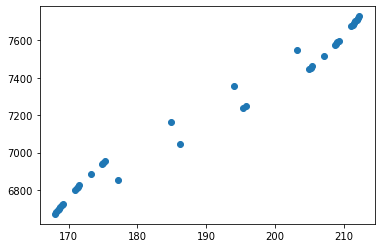

In [17]:
P.scatterPolygon()

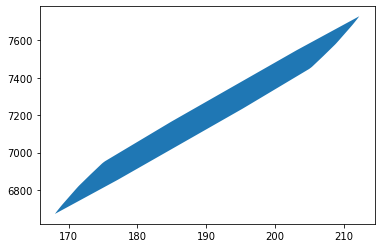

In [18]:
P.plotPolygon()

In [19]:
len(P.vertices)

37

In [20]:
for i in range(37):
    print(vars(P.vertices[i]))

{'v': array([ 168.00974684, 6671.18079592])}
{'v': array([ 177.1147267 , 6853.28039305])}
{'v': array([ 186.21970655, 7044.48497003])}
{'v': array([ 195.32468641, 7235.68954701])}
{'v': array([ 195.83551203, 7246.92771073])}
{'v': array([ 204.94049189, 7447.23726757])}
{'v': array([ 205.22817396, 7455.00468353])}
{'v': array([ 205.41049552, 7460.65665179])}
{'v': array([ 207.04029652, 7517.69968683])}
{'v': array([ 208.67009752, 7576.37252288])}
{'v': array([ 208.85421838, 7583.36911567])}
{'v': array([ 209.03833925, 7590.91807106])}
{'v': array([ 209.24099136, 7599.22680765])}
{'v': array([ 211.05491322, 7675.41152595])}
{'v': array([ 211.25756534, 7684.12556677])}
{'v': array([ 211.46021745, 7693.24491182])}
{'v': array([ 211.66286956, 7702.56690897])}
{'v': array([ 211.84519112, 7710.95370059])}
{'v': array([ 212.04784323, 7720.68100197])}
{'v': array([ 212.23016479, 7729.61475825])}
{'v': array([ 203.12518493, 7547.51516112])}
{'v': array([ 194.02020507, 7356.31058414])}
{'v': arra

## Trying for all data in cps

In [118]:
n = cps.shape[0]

In [120]:
start_time = datetime.now() 

G = []
for i in range(n):
    vl = setBLP.Vertex((yl[i]/n, yl[i]*x1[i]/n))
    vu = setBLP.Vertex((yu[i]/n, yu[i]*x1[i]/n))
    p = setBLP.Polygon(vl, vu) # a polygon with only two vertices is actually a segment
    p.sort()
    G.append(p)
    
m = int(n)
while m>1:
    if m %2 !=0: # if we have odd numbers of polygons to add up
        G[0] = setBLP.minkowskiSum(G[0], G[m-1])
        G[0].sort()
        m -=1
    for j in range(int(m/2)):
        G[j] = setBLP.minkowskiSum(G[j], G[m-1-j])
        G[j].sort()
    m = int(m/2)
    print(len(G[0].vertices))
    
end_time = datetime.now() 
  
time_difference = (end_time - start_time).total_seconds()
print("Execution time: ", time_difference, "s")

6
13
21
52
106
219
329
771
1198
2054
3785
10633
24426
38207
Execution time:  14.705717 s


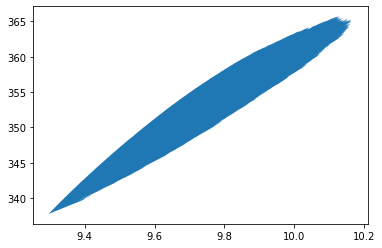

In [121]:
G[0].sort()
G[0].plotPolygon()

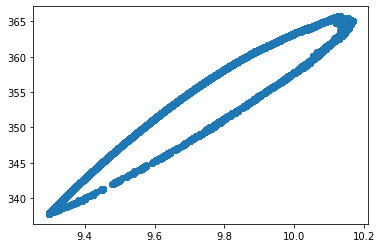

In [122]:
G[0].scatterPolygon()

## 1. Testing the oneDproj function

In [25]:
r1=setBLP.oneDproj(yl,yu,x1)

In [26]:
vars(r1)

{'bound': [-0.004887858329797927, 0.14865963017398873],
 'Htest': <setBLP.TestResults at 0x7fe3439c4730>,
 'dHtest': <setBLP.TestResults at 0x7fe37558dfd0>}

In [27]:
vars(r1.Htest)

{'TestStat': None,
 'criticalVal': 0.7047452080966828,
 'ConfidenceInterval': [-0.009563871880058493, 0.1533356437242493]}

In [28]:
vars(r1.dHtest)

{'TestStat': None,
 'criticalVal': 0.5974789676534665,
 'ConfidenceInterval': [-0.008852155946362954, 0.15262392779055375]}

In [29]:
r2=setBLP.oneDproj(yl,yu,x2)

In [30]:
vars(r2)

{'bound': [0.001786042221938278, 0.3685793555816805],
 'Htest': <setBLP.TestResults at 0x7fe35022bf40>,
 'dHtest': <setBLP.TestResults at 0x7fe37558f130>}

In [31]:
vars(r2.Htest)

{'TestStat': None,
 'criticalVal': 2.45608530397215,
 'ConfidenceInterval': [-0.014510185166377709, 0.38487558296999647]}

In [32]:
vars(r2.dHtest)

{'TestStat': None,
 'criticalVal': 2.1522110409953727,
 'ConfidenceInterval': [-0.012493966886451614, 0.38285936469007037]}

In [33]:
r3=setBLP.oneDproj(yl,yu,x,0)

/Users/yunyun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [34]:
vars(r3)

{'bound': [-0.009051777215653997, 0.14432389300936818],
 'Htest': <setBLP.TestResults at 0x7fe360258d60>,
 'dHtest': <setBLP.TestResults at 0x7fe34348df70>}

In [35]:
vars(r3.Htest)

{'TestStat': None,
 'criticalVal': 1.2481549617964003,
 'ConfidenceInterval': [-0.017333336915715473, 0.15260545270942966]}

In [36]:
vars(r3.dHtest)

{'TestStat': None,
 'criticalVal': 0.9464368350281701,
 'ConfidenceInterval': [-0.015331424688546516, 0.1506035404822607]}

In [37]:
r4=setBLP.oneDproj(yl,yu,x,1)

In [38]:
vars(r4)

{'bound': [-0.025567837808786895, 0.3456382284304264],
 'Htest': <setBLP.TestResults at 0x7fe34348daf0>,
 'dHtest': <setBLP.TestResults at 0x7fe343490670>}

In [39]:
vars(r4.Htest)

{'TestStat': None,
 'criticalVal': 5.564816011424855,
 'ConfidenceInterval': [-0.06249062178117508, 0.3825610124028146]}

In [40]:
vars(r4.dHtest)

{'TestStat': None,
 'criticalVal': 5.2010007031488295,
 'ConfidenceInterval': [-0.06007669219109614, 0.3801470828127357]}

In [41]:
r5=setBLP.oneDproj(yl,yu,x)

In [42]:
vars(r5[0])

{'bound': [-0.009051777215653997, 0.14432389300936818],
 'Htest': <setBLP.TestResults at 0x7fe34348d850>,
 'dHtest': <setBLP.TestResults at 0x7fe343490280>}

In [43]:
vars(r5[0].Htest)

{'TestStat': None,
 'criticalVal': 0.6934361684131858,
 'ConfidenceInterval': [-0.013652754820734766, -0.020966860203706125]}

In [44]:
vars(r5[0].dHtest)

{'TestStat': None,
 'criticalVal': 0.5942690040626841,
 'ConfidenceInterval': [-0.012994776591274784, -0.021624838433166108]}

In [45]:
vars(r5[1])

{'bound': [-0.025567837808786895, 0.3456382284304264],
 'Htest': <setBLP.TestResults at 0x7fe375ce8070>,
 'dHtest': <setBLP.TestResults at 0x7fe375ce83a0>}

In [46]:
vars(r5[1].Htest)

{'TestStat': None,
 'criticalVal': 2.3388498311827313,
 'ConfidenceInterval': [0.12880552782293228, 0.3611565936168623]}

In [47]:
vars(r5[1].dHtest)

{'TestStat': None,
 'criticalVal': 2.0950305864517196,
 'ConfidenceInterval': [0.13042327857750016, 0.3595388428622944]}

In [48]:
r6 = setBLP.oneDproj(yl, 'logwage_u', 'age', data = cps)

In [49]:
vars(r6)

{'bound': [-0.004887858329797927, 0.14865963017398873],
 'Htest': <setBLP.TestResults at 0x7fe375ce80a0>,
 'dHtest': <setBLP.TestResults at 0x7fe375cf2ee0>}

In [50]:
vars(r6.Htest)

{'TestStat': None,
 'criticalVal': 0.7047452080966828,
 'ConfidenceInterval': [-0.009563871880058493, 0.1533356437242493]}

In [51]:
vars(r6.dHtest)

{'TestStat': None,
 'criticalVal': 0.5974789676534665,
 'ConfidenceInterval': [-0.008852155946362954, 0.15262392779055375]}

In [52]:
r7 = setBLP.oneDproj(yl, yu, 'educ', data = cps)

In [53]:
vars(r7)

{'bound': [0.001786042221938278, 0.3685793555816805],
 'Htest': <setBLP.TestResults at 0x7fe375cf2c40>,
 'dHtest': <setBLP.TestResults at 0x7fe375ccdcd0>}

In [54]:
vars(r7.Htest)

{'TestStat': None,
 'criticalVal': 2.45608530397215,
 'ConfidenceInterval': [-0.014510185166377709, 0.38487558296999647]}

In [55]:
vars(r7.dHtest)

{'TestStat': None,
 'criticalVal': 2.1522110409953727,
 'ConfidenceInterval': [-0.012493966886451614, 0.38285936469007037]}

In [56]:
r8 = setBLP.oneDproj(yl, yu, ['age','educ'], 0, data = cps)

In [57]:
vars(r8)

{'bound': [-0.009051777215653997, 0.14432389300936818],
 'Htest': <setBLP.TestResults at 0x7fe375ccd160>,
 'dHtest': <setBLP.TestResults at 0x7fe375ccd190>}

In [58]:
vars(r8.Htest)

{'TestStat': None,
 'criticalVal': 1.2481549617964003,
 'ConfidenceInterval': [-0.017333336915715473, 0.15260545270942966]}

In [59]:
vars(r8.dHtest)

{'TestStat': None,
 'criticalVal': 0.9464368350281701,
 'ConfidenceInterval': [-0.015331424688546516, 0.1506035404822607]}

In [60]:
r9 = setBLP.oneDproj('logwage_l', 'logwage_u', ['age','educ'], 1, data = cps)

In [61]:
vars(r9)

{'bound': [-0.025567837808786895, 0.3456382284304264],
 'Htest': <setBLP.TestResults at 0x7fe375ec21f0>,
 'dHtest': <setBLP.TestResults at 0x7fe375ec2820>}

In [62]:
vars(r9.Htest)

{'TestStat': None,
 'criticalVal': 5.564816011424855,
 'ConfidenceInterval': [-0.06249062178117508, 0.3825610124028146]}

In [63]:
vars(r9.dHtest)

{'TestStat': None,
 'criticalVal': 5.2010007031488295,
 'ConfidenceInterval': [-0.06007669219109614, 0.3801470828127357]}

In [64]:
r10 = setBLP.oneDproj(yl, yu, ['age','educ'], data = cps)

In [65]:
vars(r10[0])

{'bound': [-0.009051777215653997, 0.14432389300936818],
 'Htest': <setBLP.TestResults at 0x7fe375ec2310>,
 'dHtest': <setBLP.TestResults at 0x7fe375ec2040>}

In [66]:
vars(r10[0].Htest)

{'TestStat': None,
 'criticalVal': 0.6934361684131858,
 'ConfidenceInterval': [-0.013652754820734766, -0.020966860203706125]}

In [67]:
vars(r10[0].dHtest)

{'TestStat': None,
 'criticalVal': 0.5942690040626841,
 'ConfidenceInterval': [-0.012994776591274784, -0.021624838433166108]}

In [68]:
vars(r10[1])

{'bound': [-0.025567837808786895, 0.3456382284304264],
 'Htest': <setBLP.TestResults at 0x7fe375ecd490>,
 'dHtest': <setBLP.TestResults at 0x7fe375ecdd60>}

In [69]:
vars(r10[1].Htest)

{'TestStat': None,
 'criticalVal': 2.3388498311827313,
 'ConfidenceInterval': [0.12880552782293228, 0.3611565936168623]}

In [70]:
vars(r10[1].dHtest)

{'TestStat': None,
 'criticalVal': 2.0950305864517196,
 'ConfidenceInterval': [0.13042327857750016, 0.3595388428622944]}

# 2. Testing EY

In [71]:
r11= setBLP.EY(yl, yu, [1,2], method ='')

In [72]:
vars(r11)

{'bound': [9.296333950856683, 10.529931600617877],
 'Htest': <setBLP.TestResults at 0x7fe375ecd1c0>,
 'dHtest': <setBLP.TestResults at 0x7fe375ed6310>}

In [73]:
vars(r11.Htest)

{'TestStat': 1285.5883235395963,
 'criticalVal': 5.966572506606667,
 'ConfidenceInterval': [9.25674549595274, 10.569520055521819]}

In [74]:
vars(r11.dHtest)

{'TestStat': 1250.3816624548192,
 'criticalVal': 4.989330763465701,
 'ConfidenceInterval': [9.263229535262704, 10.563036016211855]}

In [75]:
r12= setBLP.EY(yl, yu, [9.2963,10.5299],method='')

In [76]:
vars(r12)

{'bound': [9.296333950856683, 10.529931600617877],
 'Htest': <setBLP.TestResults at 0x7fe375ed6a30>,
 'dHtest': <setBLP.TestResults at 0x7fe375edd8e0>}

In [77]:
vars(r12.Htest)

{'TestStat': 0.005116902100594215,
 'criticalVal': 5.966572506606667,
 'ConfidenceInterval': [9.25674549595274, 10.569520055521819]}

In [78]:
vars(r12.dHtest)

{'TestStat': 0.005116902100594215,
 'criticalVal': 4.989330763465701,
 'ConfidenceInterval': [9.263229535262704, 10.563036016211855]}

# Testing CI1d  

$H_0: \beta_{age} = [0, 0.15]$

In [79]:
I1 = [0, 0.15]

In [80]:
result1 = setBLP.oneDproj(yl, yu, x1, H0=I1)

In [81]:
vars(result1)

{'bound': [-0.004887858329797927, 0.14865963017398873],
 'Htest': <setBLP.TestResults at 0x7fe375edd9a0>,
 'dHtest': <setBLP.TestResults at 0x7fe375eddac0>}

In [82]:
vars(result1.Htest)

{'TestStat': 0.7366733861557336,
 'criticalVal': 0.7047452080966828,
 'ConfidenceInterval': [-0.009563871880058493, 0.1533356437242493]}

In [83]:
vars(result1.dHtest)

{'TestStat': 0.20201378841303558,
 'criticalVal': 0.5974789676534665,
 'ConfidenceInterval': [-0.008852155946362954, 0.15262392779055375]}

$H_0: \beta_{age} = [0.1, 0.25]$

In [84]:
I2 = [0.1, 0.25]

In [85]:
result2 = setBLP.oneDproj(yl, yu, x1, H0=I2)

In [86]:
vars(result2)

{'bound': [-0.004887858329797927, 0.14865963017398873],
 'Htest': <setBLP.TestResults at 0x7fe35039ae20>,
 'dHtest': <setBLP.TestResults at 0x7fe375ed6ee0>}

In [87]:
vars(result2.Htest)

{'TestStat': 15.808169662239274,
 'criticalVal': 0.7047452080966828,
 'ConfidenceInterval': [-0.009563871880058493, 0.1533356437242493]}

In [88]:
vars(result2.dHtest)

{'TestStat': 15.273510064496575,
 'criticalVal': 0.5974789676534665,
 'ConfidenceInterval': [-0.008852155946362954, 0.15262392779055375]}

$H_0: \beta_{age} = [0, 0.1]$

In [89]:
I3 = [0, 0.1]

In [90]:
result3 = setBLP.oneDproj(yl, yu, x1, H0=I3)

In [91]:
vars(result3)

{'bound': [-0.004887858329797927, 0.14865963017398873],
 'Htest': <setBLP.TestResults at 0x7fe374fad1c0>,
 'dHtest': <setBLP.TestResults at 0x7fe35039acd0>}

In [92]:
vars(result3.Htest)

{'TestStat': 7.333734349628732,
 'criticalVal': 0.7047452080966828,
 'ConfidenceInterval': [-0.009563871880058493, 0.1533356437242493]}

In [93]:
vars(result3.dHtest)

{'TestStat': 0.0,
 'criticalVal': 0.5974789676534665,
 'ConfidenceInterval': [-0.008852155946362954, 0.15262392779055375]}

$H_0: \beta_{age} = [-0.1, 0.15]$

In [94]:
I4 = [-0.1, 0.15]

In [95]:
result4 = setBLP.oneDproj(yl, yu, x1, H0=I4)

In [96]:
vars(result4)

{'bound': [-0.004887858329797927, 0.14865963017398873],
 'Htest': <setBLP.TestResults at 0x7fe342862f40>,
 'dHtest': <setBLP.TestResults at 0x7fe3503689d0>}

In [97]:
vars(result4.Htest)

{'TestStat': 14.334822889927805,
 'criticalVal': 0.7047452080966828,
 'ConfidenceInterval': [-0.009563871880058493, 0.1533356437242493]}

In [98]:
vars(result4.dHtest)

{'TestStat': 14.334822889927805,
 'criticalVal': 0.5974789676534665,
 'ConfidenceInterval': [-0.008852155946362954, 0.15262392779055375]}

# regress $yl, yu$ on age, educ $\rightarrow$ $\beta_{age}$

In [99]:
ols3 = smf.ols(formula='logwage_l ~ educ+age',data=cps).fit(cov_type='HC1')
betal = ols3._results.params[2]
print(ols3.summary())

                            OLS Regression Results                            
Dep. Variable:              logwage_l   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     982.3
Date:                Wed, 25 Oct 2023   Prob (F-statistic):               0.00
Time:                        01:28:32   Log-Likelihood:                -56435.
No. Observations:               22715   AIC:                         1.129e+05
Df Residuals:                   22712   BIC:                         1.129e+05
Df Model:                           2                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3251      0.151     21.988      0.0

In [100]:
ols4 = smf.ols(formula='logwage_u ~ educ+age',data=cps).fit(cov_type='HC1')
betau = ols4._results.params[2]
print(ols4.summary())

                            OLS Regression Results                            
Dep. Variable:              logwage_u   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     3220.
Date:                Wed, 25 Oct 2023   Prob (F-statistic):               0.00
Time:                        01:28:32   Log-Likelihood:                -27984.
No. Observations:               22715   AIC:                         5.597e+04
Df Residuals:                   22712   BIC:                         5.600e+04
Df Model:                           2                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.5141      0.037    201.564      0.0

In [101]:
I5 = [min(betal, betau), max(betal, betau)]

In [102]:
result5 = setBLP.oneDproj(yl, yu, x1, H0=I5)

In [103]:
vars(result5)

{'bound': [-0.004887858329797927, 0.14865963017398873],
 'Htest': <setBLP.TestResults at 0x7fe3430e0220>,
 'dHtest': <setBLP.TestResults at 0x7fe37558ecd0>}

In [104]:
vars(result5.Htest)

{'TestStat': 7.556630260160127,
 'criticalVal': 0.7047452080966828,
 'ConfidenceInterval': [-0.009563871880058493, 0.1533356437242493]}

In [105]:
vars(result5.dHtest)

{'TestStat': 0.0,
 'criticalVal': 0.5974789676534665,
 'ConfidenceInterval': [-0.008852155946362954, 0.15262392779055375]}

# Two ways to access the list of all attributes and values:

In [106]:
result.__dict__

NameError: name 'result' is not defined

In [ ]:
vars(result)

In [ ]:
vars(result.dHtest)

# Simulations

## parameter

In [ ]:
rng = np.random.MT19937(15217)
rng = np.random.Generator(rng)
np.random.seed(setBLP.default_options.seed)

In [ ]:
popSize = cps.shape[0]

In [ ]:
Nobs = 100;  #size of sub sample
Nsim = 5000; #number of simulations

In [ ]:
Nintervals = 8; #number of intervals in the survey

## Using quantiles

In [ ]:
c = 0 
width=0
for i in range(Nsim):
    indx = rng.integers(low=0, high=popSize, size=Nobs)
    sample = cps.iloc[indx, :]
    r = setBLP.oneDproj(sample.logwage_l,sample.logwage_u,sample.educ)
    width += max(r)-min(r)
    if beta1>=min(r) and beta1 <=max(r):
        c+=1
    
width=width/Nsim

In [ ]:
i = 0 
indx = rng.integers(low=0, high=popSize, size=Nobs)
sample = cps.iloc[indx, :]
r = setBLP.oneDproj(sample.logwage_l,sample.logwage_u,sample.educ)

In [ ]:
r

In [ ]:
c/Nsim

In [ ]:
width

## Using fixed intervals, ver 1

In [ ]:
thresholds = np.linspace(1,max(cps.wage)+1,10)
thresholds

In [ ]:
interval_cps = createIntervalData(cps, 'wage', thresholds)
interval_cps.head(15)

In [ ]:
c = 0 
width =0
for i in range(Nsim):
    indx = rng.integers(low=0, high=popSize, size=Nobs)
    sample = interval_cps.iloc[indx, :]
    r = setBLP.oneDproj(sample.logwage_l,sample.logwage_u,sample.educ)
    width+=max(r)-min(r)
    if beta1>=min(r) and beta1 <=max(r):
        c+=1
width=width/Nsim

In [ ]:
c/Nsim

In [ ]:
width

## Using fixed intervals, ver 2

In [ ]:
max(cps.wage)

In [ ]:
thresholds = np.array([0, 10, 20, 40, 75, 100, 200, 300, 500 ])*1000
thresholds[0] =1

In [ ]:
interval_cps = createIntervalData(cps, 'wage', thresholds)
interval_cps.head(15)

In [ ]:
c = 0 
width =0
for i in range(Nsim):
    indx = rng.integers(low=0, high=popSize, size=Nobs)
    sample = interval_cps.iloc[indx, :]
    r = setBLP.oneDproj(sample.logwage_l,sample.logwage_u,sample.educ)
    width+=max(r)-min(r)
    if beta1>=min(r) and beta1 <=max(r):
        c+=1
        
width=width/Nsim

In [ ]:
c/Nsim

In [ ]:
width

### Conclusion:  
The id interval is so wide that there is no chance that true $\beta_1$ is not in the computed identification set.

(age, wage) pair